In [ ]:
import torch as tch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def func1(w, b):
  return (w-3)*(b-4)+b**2+5*w**2

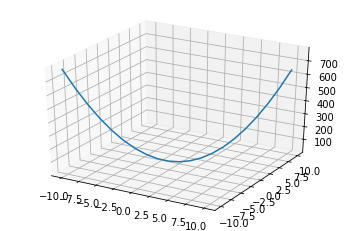

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
w = np.arange(-10, 11)
b = np.arange(-10, 11)
y = (func1(w, b))
ax.plot3D(w, b, y)
plt.show()

In [ ]:
wb = tch.tensor([[3.0], [4.0]], requires_grad=True)
a = 0.01
for i in range(1000):
  func = (wb[0]-3.)*(wb[1]-4.)+wb[1]**2+5.*wb[0]**2
  func.backward()
  wb.data -= a*wb.grad
  wb.grad.zero_()
print(wb[0], wb[1])

tensor([0.2632], grad_fn=<SelectBackward0>) tensor([1.3684], grad_fn=<SelectBackward0>)


In [ ]:
fl = np.loadtxt("src1.dat")
print(fl)

[[-8.47309627e+00  4.87431185e-03]
 [ 9.36069086e+00  9.99839453e-01]
 [ 9.93774014e+00  1.00674637e+00]
 ...
 [ 4.96664382e+00  9.94146798e-01]
 [ 4.80496149e+00  1.01466888e+00]
 [-2.00002476e+00  1.40883931e-03]]


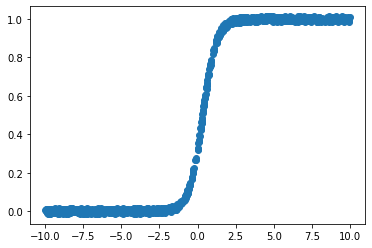

In [ ]:
plt.scatter(fl[:,0], fl[:,1])
plt.show()

In [ ]:
xten = []
yten = []
for i in fl:
  xten.append(float(i[0]))
  yten.append(float(i[1]))
wb = tch.tensor([[3.0], [3.0]], requires_grad=True)
x = tch.tensor([xten])
y = tch.tensor([yten])
a = 0.03
for i in range(1000):
  func = ((y-1./(1.+tch.exp(-(wb[0]*x+wb[1]))))**2).sum()
  func.backward()
  wb.data -= a*wb.grad
  wb.grad.zero_()
print(wb[0], wb[1])

tensor([2.2384], grad_fn=<SelectBackward0>) tensor([-0.7302], grad_fn=<SelectBackward0>)


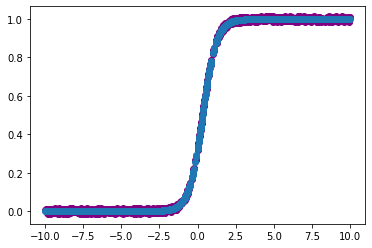

In [ ]:
wb2 = tch.tensor([[float(wb[0])], [float(wb[1])]], requires_grad=True)
a = 0.03
xs = tch.tensor(fl[:, 0])
ys = tch.tensor(fl[:, 1])
ys2 = 1./(1.+tch.exp(-(float(wb2[0])*xs+float(wb2[1]))))
plt.scatter(xs, ys, c="purple")
plt.scatter(xs, ys2)
plt.show()

In [44]:
xten = []
yten = []
for i in fl:
  xten.append(float(i[0]))
  yten.append(float(i[1]))
wb = tch.tensor([[3.0], [3.0]], requires_grad=True)
x = tch.tensor([xten])
y = tch.tensor([yten])
a = 0.03
optimizer = tch.optim.SGD([wb], lr=a)
for i in range(1000):
  func = ((y-1./(1.+tch.exp(-(wb[0]*x+wb[1]))))**2).sum()
  func.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (wb[0]-2.2384<1e-4) and (wb[1]+0.7302<1e-4):
    break
print(wb[0], wb[1], i)

tensor([2.2385], grad_fn=<SelectBackward0>) tensor([-0.7303], grad_fn=<SelectBackward0>) 233


In [62]:
def act(x, w):
 return 1./(1.+tch.exp(-(w[0]*x+w[1])))

def bce(y_teacher, y):
 return (-y_teacher*tch.log(y)-(1.-y_teacher)*tch.log(1.-y)).mean()


w=tch.tensor([[0.0], [0.0]], requires_grad=True)
fl = np.loadtxt("train_bce.dat")
xn=[]
yn=[]
for s in fl:
  xn.append(float(s[0]))
  yn.append(float(s[1]))

x=tch.tensor([xn])
y=tch.tensor([yn])
x_ans = 0.
y_ans = 0.
for step in range(200001):
 alpha = 0.00005
 function = bce(y, act(x, w)) 
 function.backward()
 w.data -= alpha*w.grad
 w.grad.zero_()
 if(step % 100 == 99):
  print (w.data[0], w.data[1], step)

tensor([6.6941e-05]) tensor([-0.0010]) 99
tensor([4.3164e-05]) tensor([-0.0020]) 199
tensor([6.3398e-05]) tensor([-0.0030]) 299
tensor([5.1013e-05]) tensor([-0.0040]) 399
tensor([6.3216e-05]) tensor([-0.0050]) 499
tensor([5.7689e-05]) tensor([-0.0060]) 599
tensor([6.4355e-05]) tensor([-0.0071]) 699
tensor([6.3248e-05]) tensor([-0.0081]) 799
tensor([6.6760e-05]) tensor([-0.0091]) 899
tensor([6.7761e-05]) tensor([-0.0101]) 999
tensor([7.0024e-05]) tensor([-0.0111]) 1099
tensor([7.1707e-05]) tensor([-0.0121]) 1199
tensor([7.3631e-05]) tensor([-0.0131]) 1299
tensor([7.5465e-05]) tensor([-0.0141]) 1399
tensor([7.7330e-05]) tensor([-0.0151]) 1499
tensor([7.9185e-05]) tensor([-0.0161]) 1599
tensor([8.1042e-05]) tensor([-0.0171]) 1699
tensor([8.2903e-05]) tensor([-0.0181]) 1799
tensor([8.4758e-05]) tensor([-0.0191]) 1899
tensor([8.6616e-05]) tensor([-0.0201]) 1999
tensor([8.8473e-05]) tensor([-0.0211]) 2099
tensor([9.0330e-05]) tensor([-0.0221]) 2199
tensor([9.2189e-05]) tensor([-0.0231]) 2299

In [63]:
def softmax(x,w,n):
 return 1.0/(tch.exp(w[0][0]*x+w[0][1]-(w[n][0]*x+w[n][1]))+tch.exp(w[1][0]*x+w[1][1]-(w[n][0]*x+w[n][1]))+tch.exp(w[2][0]*x+w[2][1]-(w[n][0]*x+w[n][1])))

def ce_1(y_teacher,x,w):
 z=softmax(x,w,int(y_teacher))
 return -1.0*tch.log(z)

def ce(y_teacher, x, w):
 s=0.
 n=0.
 sze=y_teacher[0].size()[0]
 for i in range(sze):
  s += ce_1(y_teacher[0][i],x[0][i],w)
  n += 1.
 return s/n

w=tch.tensor([[0.0,0.0],[0.0,0.0],[0.0,0.0]],requires_grad=True)
fl = np.loadtxt("train_ce.dat")
xn=[]
yn=[]
for s in fl:
  xn.append(float(s[0]))
  yn.append(float(s[1]))
xn=[]
yn=[]
x=tch.tensor([xn])
y=tch.tensor([yn])
for step in range(10001):
 alpha=0.00002
 function = ce(y,x,w)
 function.backward()
 w.data-=alpha*w.grad
 w.grad.zero_()
# if(step % 10 ==9):
 print (w.data[0],w.data[1],w.data[2],step)


0


ZeroDivisionError: ignored

In [66]:
import torch
import numpy as np

class FirstNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(FirstNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.sm = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

import sys
f=open("train_ce.dat")
l=f.read().split("\n")
xn=[]
yn=[]
for s in l:
 z=s.split()
 if(z):
  xn.append([float(z[0])])
  yn.append(int(z[1]))

x=torch.tensor(xn)
y=torch.tensor(yn)

first_net = FirstNet(3)

loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(first_net.parameters(),lr=1.0e-3)

for epoch in range(5000):
 optimizer.zero_grad()
 x_batch = x
 y_batch = y

 preds = first_net.forward(x_batch)
 loss_value = loss(preds, y_batch)
 loss_value.backward()       
 optimizer.step()
        
 if epoch % 100 == 0:
  test_preds = first_net.forward(x)
  test_preds = test_preds.argmax(dim=1)
  print((test_preds == y).float().mean())


# test_preds = first_net.forward(x)
# test_preds = test_preds.argmax(dim=1)
# for i in range(y.size()[0]):
#  print(x[i],y[i],test_preds[i])

tensor(0.3038)
tensor(0.3038)
tensor(0.3038)
tensor(0.3964)
tensor(0.3964)
tensor(0.4154)
tensor(0.6793)
tensor(0.6962)
tensor(0.6962)
tensor(0.6962)
tensor(0.6962)
tensor(0.6962)
tensor(0.7045)
tensor(0.7257)
tensor(0.7912)
tensor(0.8354)
tensor(0.8573)
tensor(0.8898)
tensor(0.9080)
tensor(0.9227)
tensor(0.9311)
tensor(0.9451)
tensor(0.9499)
tensor(0.9589)
tensor(0.9609)
tensor(0.9667)
tensor(0.9646)
tensor(0.9691)
tensor(0.9686)
tensor(0.9735)
tensor(0.9724)
tensor(0.9770)
tensor(0.9759)
tensor(0.9765)
tensor(0.9785)
tensor(0.9793)
tensor(0.9800)
tensor(0.9800)
tensor(0.9812)
tensor(0.9812)
tensor(0.9820)
tensor(0.9828)
tensor(0.9653)
tensor(0.9850)
tensor(0.9858)
tensor(0.9866)
tensor(0.9866)
tensor(0.9866)
tensor(0.9873)
tensor(0.9873)
